# Movie Ratings Prediction using Artificial Neural Networks

### 1. Authors Information:

+ 1312716 - La Ngọc Thùy An

+ 1312693 - Hà Đức Việt

### 2. Problem statement

An attempt on building a robust feedforward neural network from movie’s features: its genre, its release dates.

### 3. Dataset

Dataset is collected from MovieLens 100K Dataset - GroupLens (http://grouplens.org/datasets/movielens/100k/).

After pre-processing, it includes 1680 movies. Each movie has 20 features of film (day, month, 18 kinds of genre) and average ratings.

### 4. Model Architecture

Our model consists of one hidden layer with 15 units. It can easily scale up to larger model with a few changes but hyperparameters must be chosen carefully.

We train our model with mini-batch stochastic gradient descent algorithm. In all experiments, we use early stopping with patience equals to 6000 epochs, up to a maximum of 10000 epochs. Our learning algorithm’s hyperparameters are as follows: mini-batch size of 150, momentum of 0.9, and learning rate of 0.001

### 5. Error Metric

+ Mean Squared Error: $MSE = \dfrac{1}{n} \sum_i^n{(h_W(x^i) - y^i)^2} $ Where $h_W(x)$ is predicted rating of our model.
+ $R^2 = 1 - \dfrac{MSE}{MST} $, Where MSE is defined above, and MST is equals to MSE of our model on training set.

## 6. Experiment and Result

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from run_hec import *

Size of train data: 10143, Size of validation data: 2001, Size of test data: 2000


## 6.1 Activation function:

Cài đặt danh sách tham số và hàm chạy tổng quát để tiện thử nghiệm. Hàm exp_activation_fucntion(act_func) sẽ lần lượt thử từng bộ tham số (learning rate, momentum) lấy từ trong danh sách với hàm kích hoạt act_func tương ứng.

In [3]:
parm.n_epoch = 4000
parm.max_patience = 2500
parm.mnb_size = 150
    
parm.lamda = 0.0
parm.run_dropout = False
parm.run_batchnorm = False

learning_rate_list = [0.001, 0.005, 0.01]
momentum_list = [0.9]

In [4]:
def exp_activation_function(act_func):
    for learning_rate in learning_rate_list:
        for momentum in momentum_list:
            parm.act_func = act_func
            parm.learning_rate = learning_rate
            parm.momentum = momentum
            _, _, _ = run_training(True)

### 6.1.1 Find the best parameters of SIGMOID

Activation function: SIGMOID
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 872: 
	Adjusted R-squared in training set   = 0.2379
	Error in training set  : MSE = 0.3116, RMSE = 0.5582
	Error in validation set: MSE = 0.3285, RMSE = 0.5731


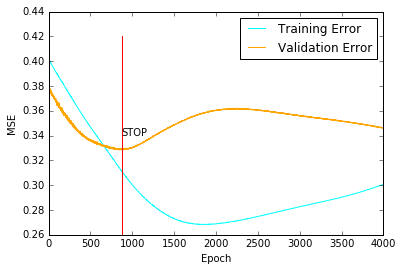

Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 171: 
	Adjusted R-squared in training set   = 0.2354
	Error in training set  : MSE = 0.3126, RMSE = 0.5591
	Error in validation set: MSE = 0.3284, RMSE = 0.5731


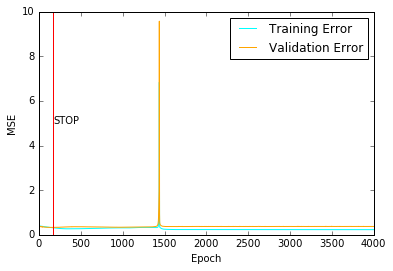

Training with learning rate = 0.0100, momentum = 0.9000
Early stopping at epoch 84: 
	Adjusted R-squared in training set   = 0.2333
	Error in training set  : MSE = 0.3135, RMSE = 0.5599
	Error in validation set: MSE = 0.3283, RMSE = 0.5729


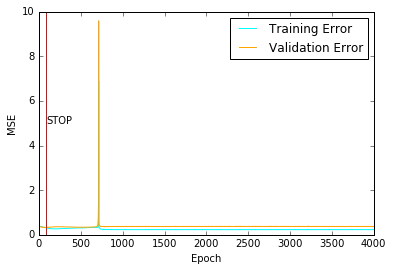

In [5]:
print "Activation function: SIGMOID"
exp_activation_function(parm.SIGMOID)

### 6.1.2 Find the best parameters of Rectified Linear

Activation function: RELU
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 32: 
	Adjusted R-squared in training set   = 0.3916
	Error in training set  : MSE = 0.2487, RMSE = 0.4987
	Error in validation set: MSE = 0.3599, RMSE = 0.5999


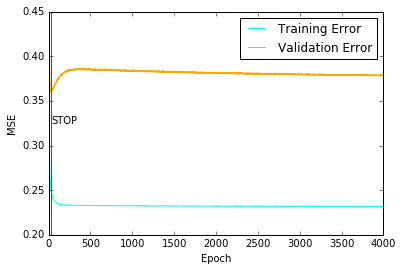

Training with learning rate = 0.0050, momentum = 0.9000
Early stopping at epoch 6: 
	Adjusted R-squared in training set   = 0.3923
	Error in training set  : MSE = 0.2485, RMSE = 0.4985
	Error in validation set: MSE = 0.3588, RMSE = 0.5990


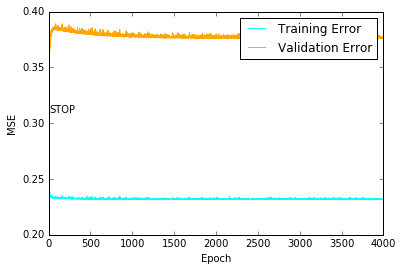

Training with learning rate = 0.0100, momentum = 0.9000


KeyboardInterrupt: 

In [6]:
print "Activation function: RELU"
exp_activation_function(parm.RELU)

Fixed parameters

In [7]:
def default_model():
    parm.mnb_size = 150
    parm.layers = [15]
    
    parm.n_epoch = 3000
    parm.max_patience = 2000
    
    parm.learning_rate = 0.001
    parm.momentum = 0.9
    
    parm.lamda = 0.00
    parm.run_dropout = False
    parm.run_batchnorm = False
    
default_model()

Best of SIGMOID
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 872: 
	Adjusted R-squared in training set   = 0.2379
	Error in training set  : MSE = 0.3116, RMSE = 0.5582
	Error in validation set: MSE = 0.3285, RMSE = 0.5731


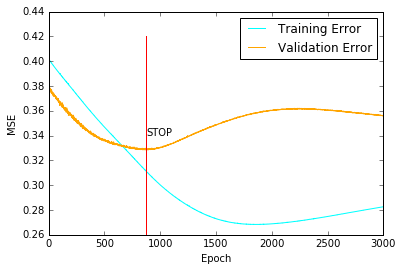

In [8]:
print 'Best of SIGMOID'
parm.act_func = parm.SIGMOID
SIG_Train_Errs, SIG_Val_Errs, SIG_Model = run_training(True)

write_result('Result/SIG_Train_Errs.csv', SIG_Train_Errs)
write_result('Result/SIG_Val_Errs.csv', SIG_Val_Errs)

Best of RELU
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 32: 
	Adjusted R-squared in training set   = 0.3916
	Error in training set  : MSE = 0.2487, RMSE = 0.4987
	Error in validation set: MSE = 0.3599, RMSE = 0.5999


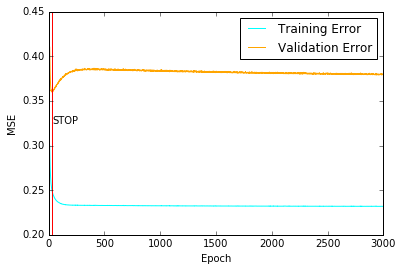

In [9]:
print 'Best of RELU'
parm.act_func = parm.RELU
RELU_Train_Errs, RELU_Val_Errs, RELU_Model = run_training(True)

write_result('Result/RELU_Train_Errs.csv', RELU_Train_Errs)
write_result('Result/RELU_Val_Errs.csv', RELU_Val_Errs)

### 6.2.2 Regularization

In [ ]:
def overfit_model():
    default_model()
    parm.n_epoch = 50000
    parm.max_epoch = 30000

### Weight Decay

SIGMOID with Weight Decay
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 872: 
	Adjusted R-squared in training set   = 0.2366
	Error in training set  : MSE = 0.3121, RMSE = 0.5587
	Error in validation set: MSE = 0.3285, RMSE = 0.5731


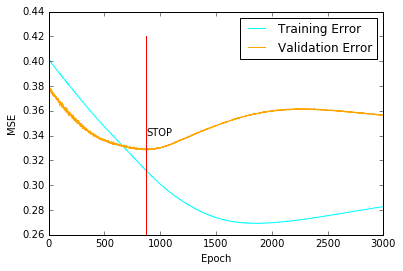

In [10]:
print 'SIGMOID with Weight Decay'
default_model()
parm.act_func = parm.SIGMOID 
parm.lamda = 0.00001

SIG_WD_Train_Errs, SIG_WD_Val_Errs, SIG_WD_Model = run_training(True)

write_result('Result/SIG_WD_Train.csv', SIG_WD_Train_Errs)
write_result('Result/SIG_WD_Val.csv', SIG_WD_Val_Errs)

SIGMOID with Weight Decay
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 893: 
	Adjusted R-squared in training set   = 0.2293
	Error in training set  : MSE = 0.3151, RMSE = 0.5613
	Error in validation set: MSE = 0.3282, RMSE = 0.5729


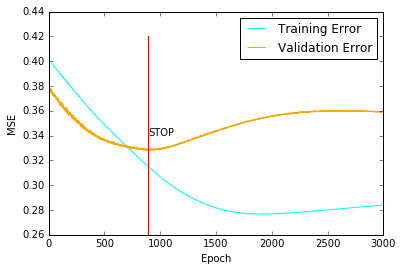

In [11]:
print 'SIGMOID with Weight Decay'
default_model()
parm.act_func = parm.SIGMOID
parm.lamda = 0.0001

SIG_WD_Train_Errs_2, SIG_WD_Val_Errs_2, SIG_WD_Model_2 = run_training(True)
write_result('Result/SIG_WD_Train_2.csv', SIG_WD_Train_Errs_2)
write_result('Result/SIG_WD_Val_2.csv', SIG_WD_Val_Errs_2)

RELU with Weight Decay
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 32: 
	Adjusted R-squared in training set   = 0.3916
	Error in training set  : MSE = 0.2487, RMSE = 0.4987
	Error in validation set: MSE = 0.3599, RMSE = 0.5999


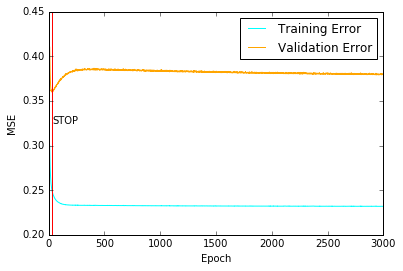

In [12]:
print 'RELU with Weight Decay'
default_model()
#parm.n_epoch = 20000
parm.act_func = parm.RELU
parm.lamda = 0.00001

RELU_WD_Train_Errs, RELU_WD_Val_Errs, RELU_WD_Model = run_training(True)
write_result('Result/RELU_WD_Train.csv', RELU_WD_Train_Errs)
write_result('Result/RELU_WD_Val.csv', RELU_WD_Val_Errs)

RELU with Weight Decay
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 32: 
	Adjusted R-squared in training set   = 0.3915
	Error in training set  : MSE = 0.2488, RMSE = 0.4988
	Error in validation set: MSE = 0.3598, RMSE = 0.5999


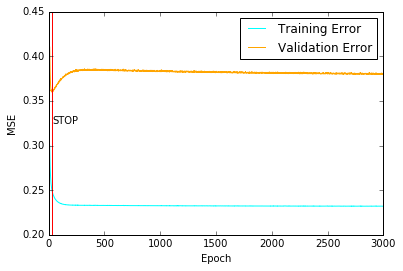

In [13]:
print 'RELU with Weight Decay'
default_model()
# parm.n_epoch = 20000
parm.act_func = parm.RELU
parm.lamda = 0.0001

RELU_WD_Train_Errs_2, RELU_WD_Val_Errs_2, RELU_WD_Model_2 = run_training(True)

write_result('Result/RELU_WD_Train_2.csv', RELU_WD_Train_Errs_2)
write_result('Result/RELU_WD_Val_2.csv', RELU_WD_Val_Errs_2)

### Dropout

SIGMOID with Dropout
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 7: 
	Adjusted R-squared in training set   = 0.0126
	Error in training set  : MSE = 0.4037, RMSE = 0.6354
	Error in validation set: MSE = 0.3703, RMSE = 0.6085


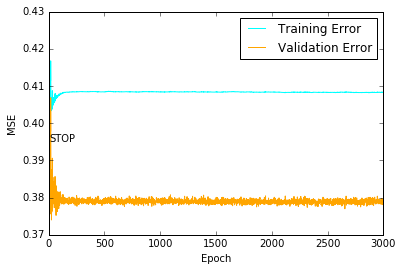

In [14]:
print 'SIGMOID with Dropout'
default_model()
parm.act_func = parm.SIGMOID 
parm.run_dropout = True

SIG_DR_Train_Errs, SIG_DR_Val_Errs, SIG_DR_Model = run_training(True)

write_result('Result/SIG_DR_Train.csv', SIG_DR_Train_Errs)
write_result('Result/SIG_DR_Val.csv', SIG_DR_Val_Errs)

RELU with Dropout
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 63: 
	Adjusted R-squared in training set   = 0.3852
	Error in training set  : MSE = 0.2514, RMSE = 0.5014
	Error in validation set: MSE = 0.3534, RMSE = 0.5945


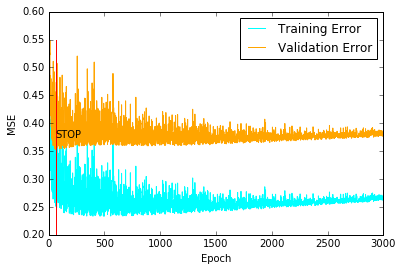

In [15]:
print 'RELU with Dropout'
default_model()
parm.act_func = parm.RELU
parm.run_dropout = True

RELU_DR_Train_Errs, RELU_DR_Val_Errs, RELU_DR_Model = run_training(True)

write_result('Result/RELU_DR_Train.csv', RELU_DR_Train_Errs)
write_result('Result/RELU_DR_Val.csv', RELU_DR_Val_Errs)

### 6.2.3. Batch normalization

In [20]:
def batchnorm_model():
    parm.learning_rate = 0.001
    parm.n_epoch = 1000
    parm.max_patience = 600
    parm.run_dropout = False
    parm.lamda = 0.0

SIGMOID with Batch Normalization
Training with learning rate = 0.0010, momentum = 0.9000
Early stopping at epoch 47: 
	Adjusted R-squared in training set   = 0.3359
	Error in training set  : MSE = 0.2715, RMSE = 0.5211
	Error in validation set: MSE = 0.3491, RMSE = 0.5909


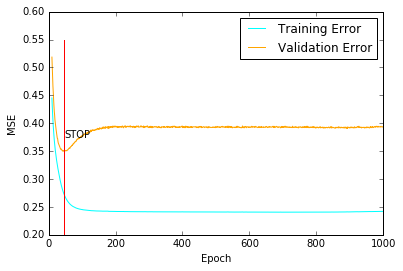

In [21]:
print 'SIGMOID with Batch Normalization'
batchnorm_model()
parm.act_func = parm.SIGMOID # SIGMOID, RELU
parm.run_batchnorm = True

SIG_BN_Train_Errs, SIG_BN_Val_Errs, SIG_BN_Model = run_training(True)

write_result('Result/SIG_BN_Train.csv', SIG_BN_Train_Errs)
write_result('Result/SIG_BN_Val.csv', SIG_BN_Val_Errs)

SIGMOID with Batch Normalization
Training with learning rate = 0.0005, momentum = 0.9000
Early stopping at epoch 97: 
	Adjusted R-squared in training set   = 0.3404
	Error in training set  : MSE = 0.2697, RMSE = 0.5193
	Error in validation set: MSE = 0.3500, RMSE = 0.5916


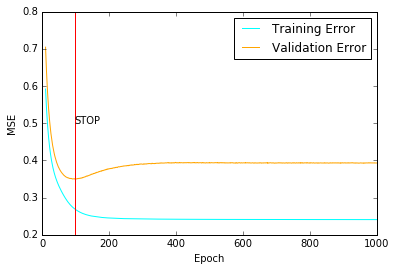

In [22]:
print 'SIGMOID with Batch Normalization'
batchnorm_model()
parm.learning_rate = 0.0005
parm.act_func = parm.SIGMOID # SIGMOID, RELU
parm.run_batchnorm = True

SIG_BN_Train_Errs2, SIG_BN_Val_Errs2, SIG_BN_Model2 = run_training(True)

write_result('Result/SIG_BN_Train_2.csv', SIG_BN_Train_Errs2)
write_result('Result/SIG_BN_Val_2.csv', SIG_BN_Val_Errs2)

RELU with Batch Normalization
Training with learning rate = 0.0005, momentum = 0.9000
Early stopping at epoch 945: 
	Adjusted R-squared in training set   = -0.6302
	Error in training set  : MSE = 0.6665, RMSE = 0.8164
	Error in validation set: MSE = 0.5519, RMSE = 0.7429


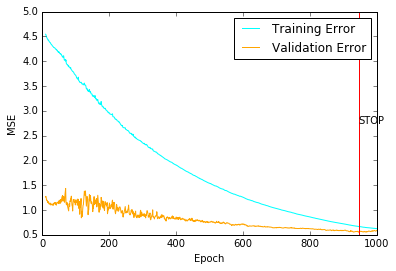

In [23]:
print 'RELU with Batch Normalization'
batchnorm_model()
parm.learning_rate = 0.0005
parm.act_func = parm.RELU # SIGMOID, RELU
parm.run_batchnorm = True

RELU_BN_Train_Errs, RELU_BN_Val_Errs, RELU_BN_Model = run_training(True)

write_result('Result/RELU_BN_Train.csv', RELU_BN_Train_Errs)
write_result('Result/RELU_BN_Val.csv', RELU_BN_Val_Errs)

RELU with Batch Normalization
Training with learning rate = 0.0500, momentum = 0.9000
Early stopping at epoch 914: 
	Adjusted R-squared in training set   = 0.4141
	Error in training set  : MSE = 0.2396, RMSE = 0.4895
	Error in validation set: MSE = 0.3528, RMSE = 0.5940


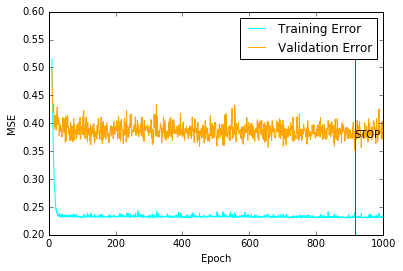

In [24]:
print 'RELU with Batch Normalization'
batchnorm_model()
parm.learning_rate = 0.05
parm.act_func = parm.RELU # SIGMOID, RELU
parm.run_batchnorm = True

RELU_BN_Train_Errs_2, RELU_BN_Val_Errs_2, RELU_BN_Model_2 = run_training(True)

write_result('Result/RELU_BN_Train_Errs_2.csv', RELU_BN_Train_Errs_2)
write_result('Result/RELU_BN_Val_Errs_2.csv', RELU_BN_Val_Errs_2)

## Test

In [25]:
error = run_testing(RELU_WD_Model_2)
print 'RMSE = %.4f' % (np.sqrt(error))

Test:
 Adjusted R-squared: 0.0635
 Error in testing set: MSE = 0.3661
RMSE = 0.6051
